In [2]:
import networkx as nx
G = nx.Graph()
G

In [6]:
G1 = nx.cycle_graph(6)
G2 = nx.wheel_graph(7)
G3 = nx.star_graph(5)
G4 = nx.star_graph(5)

nx.graph_edit_distance(G1, G2)

7.0

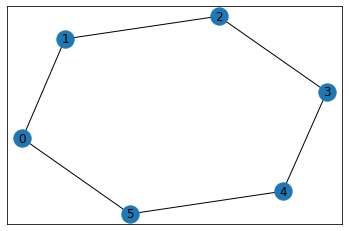

In [4]:
nx.draw_networkx(G1)

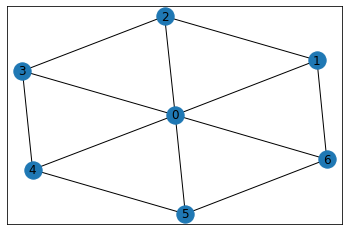

In [5]:
nx.draw_networkx(G2)

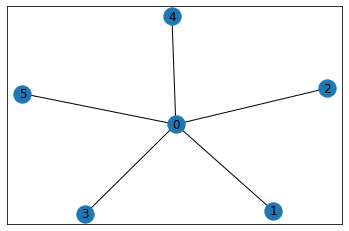

In [9]:
nx.draw_networkx(G3)

In [7]:
nx.graph_edit_distance(G3, G4, roots=(0, 0))

0.0

In [8]:
nx.graph_edit_distance(G3, G4, roots=(1, 0))

8.0

In [10]:
elist = [(1, 2), (2, 3), (1, 4), (4, 2)]
G.add_edges_from(elist)

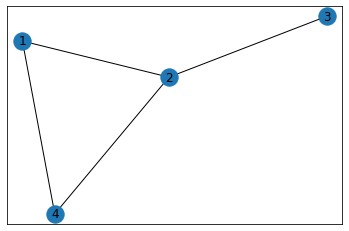

In [11]:
nx.draw_networkx(G)

[(0, 2), (0, 3), (1, 3), (0, 4), (1, 4), (2, 4), (0, 5), (1, 5), (2, 5), (3, 5), (0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7)]


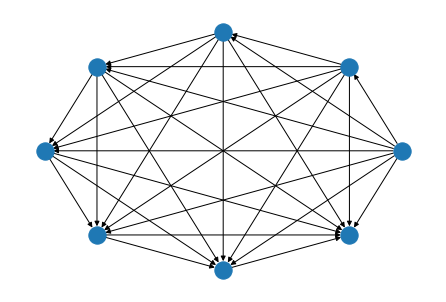

In [72]:
DG = nx.DiGraph()

n = 8
edges = [(i, i+1) for i in range(n-1)]
DG.add_edges_from(edges)
# pos = nx.kamada_kawai_layout(DG)
skip = [(j, i) for i in range(n) for j in range(i-1)]
print(skip)
DG.add_edges_from(skip)
# pos = nx.circular_layout(DG)
# top = nx.bipartite.sets(DG)[0]
# pos = nx.bipartite_layout(DG, top)
# nx.draw_networkx(DG, pos)
nx.draw_circular(DG)

In [66]:
from graphviz import Digraph

for e in DG.edges:
  print(e)

(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)
(2, 3)


In [70]:
def networkx_to_graphviz(G, format):
  g = Digraph(**format)
  
  for (n, m) in G.edges:
    g.edge(str(n), str(m))

  return g 

In [109]:
format = dict(
    format='png', 
    edge_attr=dict(fontsize='20', fontname="times"),
    node_attr=dict(style='filled', shape='rect', align='center', fontsize='20', height='0.5', width='0.5', penwidth='2', fontname="times"),
    engine='dot' # circo, dot, fdp, neato, osage, sfdp, twopi
)

In [73]:
g = networkx_to_graphviz(DG, format)
g.render()

'Digraph.gv.png'

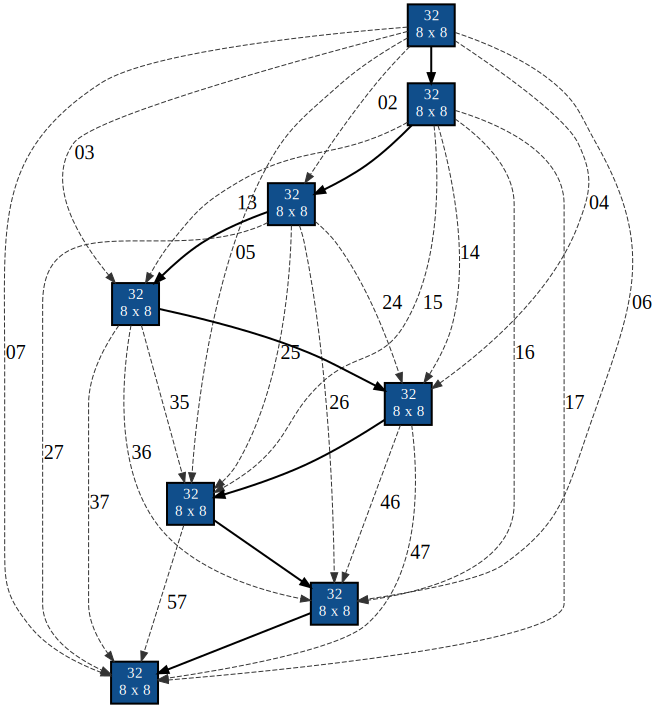

In [125]:
dg = Digraph(**format)

dg.attr('node', fillcolor='dodgerblue4', fontcolor='white', fontsize='15') # coral, 

for i in range(8):
  dg.node(str(i), label='32\n8 x 8')

with dg.subgraph(name="a") as c:
  # c.attr(color='blue', style='dotted')
  # c.edges([(str(i), str(j)) for i, j in edges])
  c.attr('edge', style='bold')
  for i, j in edges:
    c.edge(str(i), str(j))

with dg.subgraph() as c:
  c.attr('edge', style='dashed', color='gray20')
  # c.edges([(str(i), str(j)) for i, j in skip])
  for i, j in skip:
    c.edge(str(i), str(j), style='dashed', label='%d%d' % (i, j), weight='%d'%i)
dg